In [1]:
{"a", "a", "b"}

{'a', 'b'}

In [2]:
{"a", "b"} - {"b", "c"}

{'a'}

In [3]:
import pandas as pd

In [4]:
df1 = pd.DataFrame([["조퇴근", 32, 1, 0, 12000],
                    ["반차양", 28, 2, 1, 7500]],
                   columns = ["이름", "나이", "예금계좌", "적금계좌", "예금액"])
df1

이름  나이  예금계좌  적금계좌    예금액
0  조퇴근  32     1     0  12000
1  반차양  28     2     1   7500

In [47]:
import numpy as np
np.sqrt(4)

2.0

In [11]:
sum((df1.iloc[0, 1:] - df1.iloc[1, 1:]) ** 2) ** 0.5

4500.001999999556

In [16]:
df1_tr = df1.iloc[:, 1:].transpose()
df1_tr["diff"] = df1_tr[0] - df1_tr[1]
df1_tr["diff_sq"] = df1_tr["diff"] ** 2
df1_tr

0     1  diff   diff_sq
나이       32    28     4        16
예금계좌      1     2    -1         1
적금계좌      0     1    -1         1
예금액   12000  7500  4500  20250000

In [17]:
df1_tr["diff_sq"].sum() ** 0.5

4500.001999999556

In [22]:
df2 = pd.DataFrame([["조퇴근", "모니터/마우스/키보드/물티슈"],
                    ["반차양", "물티슈/충전기/마우스/하리보/꼬깔콘"]],
                   columns = ["이름", "구매물품"])
df2

In [48]:
df2["구매물품"].str.split("/")

0         [모니터, 마우스, 키보드, 물티슈]
1    [물티슈, 충전기, 마우스, 하리보, 꼬깔콘]
Name: 구매물품, dtype: object

In [52]:
df2_ls = df2["구매물품"].str.split("/")
set(df2_ls.sum())

{'꼬깔콘', '마우스', '모니터', '물티슈', '충전기', '키보드', '하리보'}

In [54]:
set(df2_ls[1]).intersection(df2_ls[0])

{'마우스', '물티슈'}

In [53]:
set(df2_ls[1]) & set(df2_ls[0])

{'마우스', '물티슈'}

In [55]:
set(df2_ls[1]) | set(df2_ls[0])

{'꼬깔콘', '마우스', '모니터', '물티슈', '충전기', '키보드', '하리보'}

In [37]:
len(set(df2_ls[1]).intersection(df2_ls[0])) / len(set(df2_ls.sum()))

0.2857142857142857

In [58]:
df2_ls2 = df2["구매물품"].str.split("/", expand = True)
df2_ls2

0    1    2    3     4
0  모니터  마우스  키보드  물티슈  None
1  물티슈  충전기  마우스  하리보   꼬깔콘

{'꼬깔콘', '마우스', '물티슈', '충전기', '하리보'}

In [29]:
df2_ls.map(set).diff()[1]

{'꼬깔콘', '충전기', '하리보'}

In [57]:
df2_ls2.iloc[0, ].isin(df2_ls2.iloc[1, ]).sum()

2

In [59]:
from scipy.spatial.distance import euclidean, jaccard

In [60]:
df1

이름  나이  예금계좌  적금계좌    예금액
0  조퇴근  32     1     0  12000
1  반차양  28     2     1   7500

In [61]:
euclidean(df1.iloc[0, 1:], df1.iloc[1, 1:])

4500.001999999556

In [63]:
df2_ls

0         [모니터, 마우스, 키보드, 물티슈]
1    [물티슈, 충전기, 마우스, 하리보, 꼬깔콘]
Name: 구매물품, dtype: object

In [65]:
set(df2_ls.sum())

{'꼬깔콘', '마우스', '모니터', '물티슈', '충전기', '키보드', '하리보'}

In [80]:
pd.Series(list(set(df2_ls.sum()))).astype("category").cat.codes.values

array([1, 6, 0, 2, 3, 4, 5], dtype=int8)

In [83]:
df2_ls

0         [모니터, 마우스, 키보드, 물티슈]
1    [물티슈, 충전기, 마우스, 하리보, 꼬깔콘]
Name: 구매물품, dtype: object

In [87]:
jaccard([0, 1, 1, 1, 0, 1, 0],
        [1, 1, 0, 1, 1, 0, 1])

0.7142857142857143

In [93]:
1 - jaccard([0, 1, 1, 1, 0, 1, 0],
            [1, 1, 0, 1, 1, 0, 1])

0.2857142857142857

In [94]:
def udf_minmax(x):
    return (x - x.min()) / (x.max() - x.min())

In [95]:
ser = pd.Series([-5, 3, 7, 9])

In [96]:
udf_minmax(ser)

0    0.000000
1    0.571429
2    0.857143
3    1.000000
dtype: float64

In [97]:
def udf_std(x):
    return (x - x.mean()) / x.std()

In [99]:
udf_std(ser)

0   -1.372874
1   -0.080757
2    0.565301
3    0.888330
dtype: float64

In [100]:
udf_std(ser).mean()

0.0

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [102]:
nor_mm = MinMaxScaler()

In [105]:
nor_mm.fit_transform(ser.to_frame())

array([[0.        ],
       [0.57142857],
       [0.85714286],
       [1.        ]])

In [106]:
nor_mm2 = MinMaxScaler()

In [107]:
nor_mm2.fit(ser.to_frame()) # 학습(최소값, 최대값을 연산하여 저장)

MinMaxScaler()

In [108]:
nor_mm2.transform(ser.to_frame()) # 변환

array([[0.        ],
       [0.57142857],
       [0.85714286],
       [1.        ]])

In [113]:
ser2 = pd.Series([3, 6, 9, 12])
nor_mm3 = MinMaxScaler()
nor_mm3.fit_transform(ser2.to_frame())

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [114]:
nor_mm2.transform(ser2.to_frame())

array([[0.57142857],
       [0.78571429],
       [1.        ],
       [1.21428571]])

In [117]:
nor_std = StandardScaler()
nor_std.fit_transform(ser.to_frame())

array([[-1.58525817],
       [-0.09325048],
       [ 0.65275337],
       [ 1.02575529]])

In [118]:
df = pd.read_csv("iris.csv")
df.head(1)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa

In [123]:
nor_mm4 = MinMaxScaler()
df_nor = n
or_mm4.fit_transform(df.iloc[:, :-1])
df_nor = pd.DataFrame(df_nor, 
                      columns = df.columns[:-1])
df_nor.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth
0     0.222222    0.625000     0.067797    0.041667
1     0.166667    0.416667     0.067797    0.041667

In [124]:
df.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth Species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa

In [125]:
df_dum = pd.get_dummies(data = df)
df_dum.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth  Species_setosa  \
0          5.1         3.5          1.4         0.2               1   
1          4.9         3.0          1.4         0.2               1   

   Species_versicolor  Species_virginica  
0                   0                  0  
1                   0                  0

In [126]:
df["is_setosa"] = (df["Species"] == "setosa") + 0
df["is_setosa"] = np.where(df["Species"] == "setosa", 1, 0)
df.head(2)

SepalLength  SepalWidth  PetalLength  PetalWidth Species  is_setosa
0          5.1         3.5          1.4         0.2  setosa          1
1          4.9         3.0          1.4         0.2  setosa          1

In [127]:
pd.crosstab(df["Species"], df["is_setosa"])

is_setosa    0   1
Species           
setosa       0  50
versicolor  50   0
virginica   50   0

In [130]:
ser_age = pd.Series([6, 12, 20, 21, 28, 35, 39, 51])

In [132]:
pd.cut(ser_age, 
       bins = [0, 10, 20, 30, 40])

0     (0.0, 10.0]
1    (10.0, 20.0]
2    (10.0, 20.0]
3    (20.0, 30.0]
4    (20.0, 30.0]
5    (30.0, 40.0]
6    (30.0, 40.0]
7             NaN
dtype: category
Categories (4, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40]]

In [133]:
pd.cut(ser_age, 
       bins = [0, 10, 20, 30, 40],
       right = False)

0     [0.0, 10.0)
1    [10.0, 20.0)
2    [20.0, 30.0)
3    [20.0, 30.0)
4    [20.0, 30.0)
5    [30.0, 40.0)
6    [30.0, 40.0)
7             NaN
dtype: category
Categories (4, interval[int64, left]): [[0, 10) < [10, 20) < [20, 30) < [30, 40)]

In [131]:
pd.cut(ser_age, 
       bins = [0, 10, 20, 30, 40],
       labels = ["a", "b", "c", "d"])

0      a
1      b
2      b
3      c
4      c
5      d
6      d
7    NaN
dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [137]:
df_bank = pd.read_csv("bank.csv", sep = ";")
df_bank.head(3)

### Q. 나이 정보가 있는 age 변수를 기반으로 10살단위로 나이를 묶은 age_group 변수를 df_bank 객체에 새로 생성하시오.
※ 7 -> 0, 19 -> 1, 30 -> 3

In [141]:
df_bank["age_group"] = pd.cut(df_bank["age"],
                              bins = [10, 20, 30, 40, 50, 60, 70, 80, 90],
                              right = False,
                              labels = [1, 2, 3, 4, 5, 6, 7, 8])

In [145]:
# 23 // 10
df_bank["age_group"] = df_bank["age"] // 10

In [146]:
pd.crosstab(df_bank["age"], df_bank["age_group"])

age_group  1   2  3  4  5  6  7  8
age                               
19         4   0  0  0  0  0  0  0
20         0   3  0  0  0  0  0  0
21         0   7  0  0  0  0  0  0
22         0   9  0  0  0  0  0  0
23         0  20  0  0  0  0  0  0
..        ..  .. .. .. .. .. .. ..
81         0   0  0  0  0  0  0  1
83         0   0  0  0  0  0  0  4
84         0   0  0  0  0  0  0  1
86         0   0  0  0  0  0  0  1
87         0   0  0  0  0  0  0  1

[67 rows x 8 columns]

In [147]:
from sklearn.datasets import make_moons

In [191]:
X

array([[-0.07796241,  1.06293368],
       [ 0.20230378, -0.06772446],
       [ 0.59980849,  0.67237698],
       [ 1.04841146, -0.65137736],
       [ 0.89124889,  0.70056406],
       [-0.37381846,  0.00460626],
       [ 1.88003707,  0.20903883],
       [-0.07894338,  0.8336929 ],
       [ 1.27853618, -0.21403038],
       [ 1.28536099, -0.43163168],
       [-0.54979335,  0.60438385],
       [ 1.84549536, -0.13617491],
       [ 2.1822481 , -0.40816874],
       [ 1.90193521,  0.12707031],
       [ 0.00410466,  0.52091552],
       [ 0.70213472,  0.85027356],
       [ 0.72127555,  0.20227421],
       [ 1.62387578,  0.17366917],
       [ 0.20843875, -0.11618847],
       [ 0.74327132,  0.61091913],
       [ 1.61783816,  0.07881724],
       [-0.91629328,  0.13443236],
       [ 1.53876031, -0.47551564],
       [ 1.42418491, -0.2620788 ],
       [ 0.57446815, -0.02193857],
       [-1.18632367,  0.88993095],
       [ 1.74020737,  0.20495805],
       [ 0.41077036,  0.71863547],
       [ 1.00437068,

<AxesSubplot:xlabel='x', ylabel='y'>

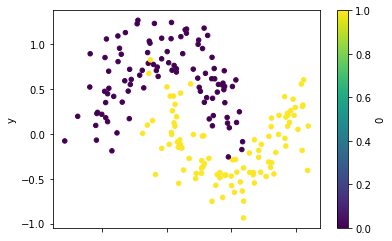

In [192]:
X, Y = make_moons(n_samples = 200, noise = 0.2,
                  random_state = 123)
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                     pd.Series(Y)], axis = 1)
df_moon.plot.scatter(x = "x", y = "y", c = 0, 
                     colormap = "viridis")

In [187]:
df_moon

x         y  0
0   -0.077962  1.062934  0
1    0.202304 -0.067724  1
2    0.599808  0.672377  0
3    1.048411 -0.651377  1
4    0.891249  0.700564  0
..        ...       ... ..
195  0.582361  0.349507  0
196 -1.089187 -0.070904  0
197 -0.259150  1.007580  0
198  0.234220 -0.154151  1
199  0.369949  0.554477  1

[200 rows x 3 columns]

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.3,
                                          random_state = 12)
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = X_tr, y = Y_tr)

y_pred = model.predict(X_te)
accuracy_score(y_pred, Y_te)

0.9166666666666666

In [173]:
pd.crosstab(y_pred, Y_te)

col_0   0   1
row_0        
0      28   2
1       1  29

### Q. 상기 모델에서 계산에 사용하는 이웃 데이터의 개수를 1부터 20까지 변화시켜가면서 각각의 분류 정확도를 산출하여 확인하시오.
 ※ 결과는 데이터프레임 객체에 정리하시오.

In [200]:
df_score = pd.DataFrame()
for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X = X_tr, y = Y_tr)

    y_pred = model.predict(X_te)
    df_score_sub = pd.DataFrame([[i, accuracy_score(y_pred, Y_te)]],
                                columns = ["n", "acc"])
    df_score = pd.concat([df_score, df_score_sub])

In [204]:
# df_score.set_index("n").plot.line()

<AxesSubplot:>

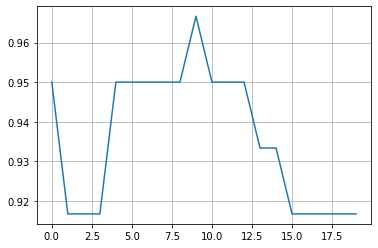

In [205]:
df_score = df_score.reset_index(drop = True)
df_score["acc"].plot.line(grid = True)

In [225]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [207]:
df = pd.read_csv("iris.csv")

In [226]:
df_tr, df_te = train_test_split(df, train_size = 0.7,
                                random_state = 123)
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X = df_tr.iloc[:, :2],
          y = df_tr["PetalLength"])

pred = model.predict(X = df_te.iloc[:, :2])
mean_squared_error(y_true = df_te["PetalLength"], y_pred = pred) ** 0.5 # RMSE

0.4035178641233455